# Analysis of Bargaining Complexity

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def parse_output_runs(output_path):

    def new_dialog_history():
        dialog_history = {"run_1": None,
                          "run_1_price": None,
                          "run_1_feedback": None,
                          "run_2": None,
                          "run_2_price": None,
                          "run_2_feedback": None,
                          "run_3": None,
                          "run_3_price": None,
                          "run_3_feedback": None,
                          "run_4": None,
                          "run_4_price": None,
                          "run_4_feedback": None,
                          "run_5": None,
                          "run_5_price": None,
                          "run_5_feedback": None,
                          }
        return dialog_history

    exp_runs = []
    with open(output_path) as fd:
        lines = fd.readlines()
        dialog_history = new_dialog_history()
        gather_feedback = False
        for li, l in enumerate(lines):
            if(l.startswith("==== ver")): # a new dialog
                if(li > 1): 
                    exp_runs.append(dialog_history)
                    dialog_history = new_dialog_history()
            elif(l.startswith("==== RUN")): # a new run
                run_i = int(l[9])
                run = []
            elif(l.startswith("PRICE:")): # deal price
                dialog_history["run_%d" % run_i] = run
                dialog_history["run_%d_price" % run_i] = float(l.split()[1])
            elif(l.startswith("FEEDBACK:")): # feedback
                feedback = []
                gather_feedback = True
            elif(l.startswith("ACK:")): # end of feedback
                dialog_history["run_%d_feedback" % run_i] = feedback
                gather_feedback = False
            elif(l.startswith("  seller:") or l.startswith("  buyer:")): # within a run
                run.append(l[2:])
            else:
                if(gather_feedback):
                    feedback.append(l)
        exp_runs.append(dialog_history)
    return exp_runs

In [54]:
def compute_dialog_complexity(exp_runs):
    char_lens = {"run_1": [], 
                 "run_2": [], 
                 "run_3": [], 
                 "run_4": [],
                 "run_5": [],
                 }
    num_conv_rounds = {"run_1": [], 
                       "run_2": [], 
                       "run_3": [], 
                       "run_4": [],
                       "run_5": [],
                       }
    for run in exp_runs:
        for i in range(1, 6):
            run_i = "run_%d" % i
            if(run[run_i] is not None):
                if(run["%s_price" % run_i] > 10 and run["%s_price" % run_i] < 20):
                    num_conv_rounds[run_i].append(len(run[run_i]))
                    char_l = 0
                    for r in run[run_i]:
                        char_l += len(r)
                    char_lens[run_i].append(char_l)
    
    char_lens_mean = []
    numb_conv_rounds_mean = []
    for i in range(1, 6):
        run_i = "run_%d" % i
        print("Average complexity, run %d: char len %.2f, round %2f" % 
            (i, 
            np.mean(char_lens[run_i]), 
            np.mean(num_conv_rounds[run_i])
            ))
        char_lens_mean.append(np.mean(char_lens[run_i]))
        numb_conv_rounds_mean.append(num_conv_rounds[run_i])
    return char_lens, num_conv_rounds, char_lens_mean, numb_conv_rounds_mean

In [92]:
def draw_compare_curve(prices, labels=None, prices_std=None, figsize=(4,2), ylim=None, legend_loc='lower right'):
    """draw the compare curve"""

    # Create a bar plot using Matplotlib
    plt.figure(figsize=figsize, dpi=250)

    def _label_to_marker_and_color(label):
        if("gpt" in label):
            marker = 'o'
        else:
            marker = "v"
        if("seller" in label):
            color = '#1f77b4'
        else:
            color = '#9467bd'
        return marker, color, label

    if(prices_std is None): prices_std = [None] * len(prices)
    for pi, li, pi_std in zip(prices, labels, prices_std):
        marker, color, label = _label_to_marker_and_color(li)
        plt.plot(np.arange(1, 6), pi, linewidth=1, label=li, marker=marker, markersize=5, zorder=10)
        # plt.plot(np.arange(1, 6), pi, linewidth=1, label=li, marker=marker, markersize=5, color=color, zorder=10)

    # Display the plot
    plt.legend(loc='upper left', fontsize=8, bbox_to_anchor=(1.05, 1))
    # plt.legend(loc=legend_loc, fontsize=6)
    if ylim is not None:
        plt.ylim(ylim)

    plt.show()
    return

In [22]:
exp_runs_gpt_4_seller = parse_output_runs("../outputs/criticize_seller_200_runs_5_rollout_ver_0.3.4.0.txt")

In [55]:
(char_lens_gpt_4_seller, 
 num_conv_rounds_gpt_4_seller, 
 char_lens_mean_gpt_4_seller, 
 num_conv_rounds_mean_gpt_4_seller) = compute_dialog_complexity(exp_runs_gpt_4_seller)

Average complexity, run 1: char len 321.80, round 6.567010
Average complexity, run 2: char len 689.75, round 8.554945
Average complexity, run 3: char len 856.75, round 8.558282
Average complexity, run 4: char len 986.14, round 8.849315
Average complexity, run 5: char len 1050.59, round 8.803279


In [57]:
exp_runs_gpt_4_buyer = parse_output_runs("../outputs/criticize_buyer_200_runs_5_rollout_ver_0.3.5.0.txt")
(char_lens_gpt_4_buyer, 
 num_conv_rounds_gpt_4_buyer, 
 char_lens_mean_gpt_4_buyer, 
 num_conv_rounds_mean_gpt_4_buyer) = compute_dialog_complexity(exp_runs_gpt_4_buyer)

Average complexity, run 1: char len 341.77, round 6.939086
Average complexity, run 2: char len 644.79, round 8.853107
Average complexity, run 3: char len 799.23, round 9.106667
Average complexity, run 4: char len 856.44, round 9.088710
Average complexity, run 5: char len 878.08, round 8.981481


In [73]:
exp_runs_claude_seller = parse_output_runs("../outputs/criticize_seller_200_runs_5_rollout_ver_0.3.6.0.txt")
(char_lens_claude_seller, 
 num_conv_rounds_claude_seller, 
 char_lens_mean_claude_seller, 
 num_conv_rounds_mean_claude_seller) = compute_dialog_complexity(exp_runs_claude_seller)

Average complexity, run 1: char len 324.40, round 7.200000
Average complexity, run 2: char len 821.69, round 8.129630
Average complexity, run 3: char len 1145.70, round 8.015385
Average complexity, run 4: char len 1381.51, round 7.941176
Average complexity, run 5: char len 1567.59, round 8.147541


In [77]:
exp_runs_claude_buyer = parse_output_runs("../outputs/criticize_buyer_200_runs_5_rollout_ver_0.3.7.0.txt")
(char_lens_claude_buyer, 
 num_conv_rounds_claude_buyer, 
 char_lens_mean_claude_buyer, 
 num_conv_rounds_mean_claude_buyer) = compute_dialog_complexity(exp_runs_claude_buyer)

Average complexity, run 1: char len 343.14, round 7.127551
Average complexity, run 2: char len 595.77, round 8.272727
Average complexity, run 3: char len 786.46, round 8.606897
Average complexity, run 4: char len 953.10, round 8.475806
Average complexity, run 5: char len 1073.41, round 8.301887


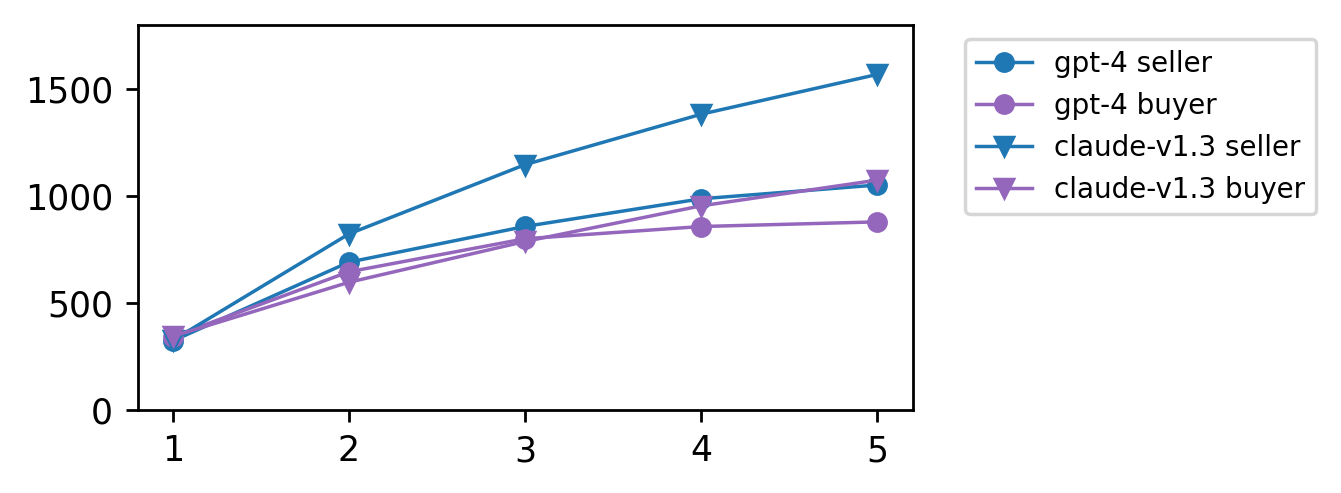

In [90]:
char_lens = [char_lens_mean_gpt_4_seller, char_lens_mean_gpt_4_buyer, 
             char_lens_mean_claude_seller, char_lens_mean_claude_buyer]

labels = ["gpt-4 seller", "gpt-4 buyer", "claude-v1.3 seller", "claude-v1.3 buyer"]

draw_compare_curve(char_lens, labels, ylim=(0, 1800))

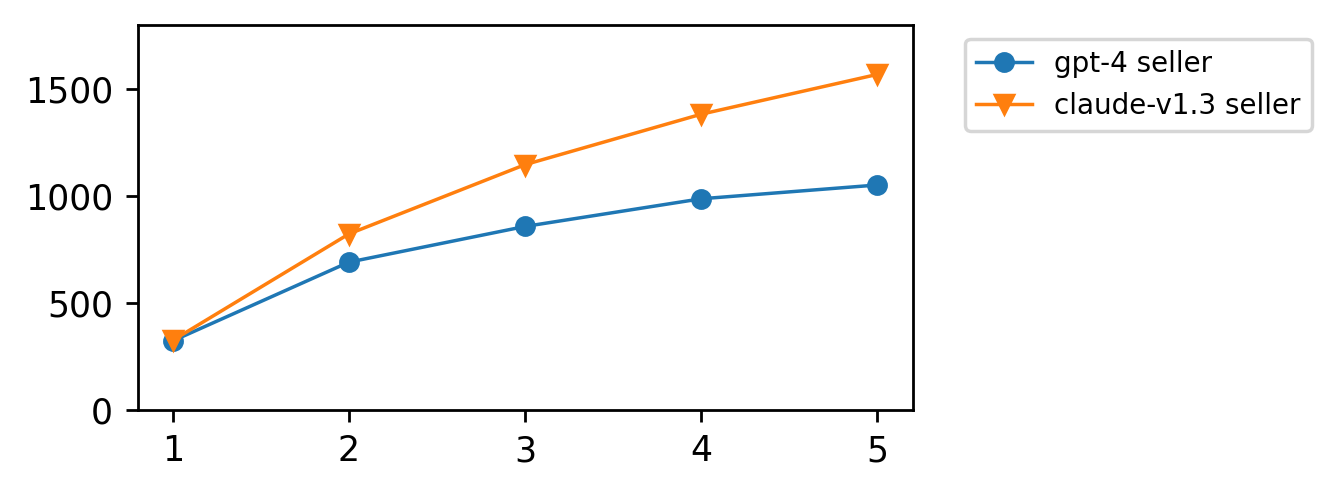

In [93]:
char_lens = [char_lens_mean_gpt_4_seller, 
             char_lens_mean_claude_seller]

labels = ["gpt-4 seller", "claude-v1.3 seller"]

draw_compare_curve(char_lens, labels, ylim=(0, 1800))